In [1]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [2]:
# split train_data into train_data and validation_data
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train, test_size=0.2)
print(x_tr.shape)
print(y_tr.shape)
print(x_val.shape)
print(y_val.shape)



(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)


In [3]:
num_pixels = x_tr.shape[1] * x_tr.shape[2]
X_train = x_tr.reshape((x_tr.shape[0], num_pixels)).astype('float32')
X_val = x_val.reshape((x_val.shape[0], num_pixels)).astype('float32')
X_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32')

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 784)
(12000, 784)
(10000, 784)


In [5]:
from tensorflow.keras.utils import to_categorical

# one-hot-encoding
y_tr = to_categorical(y_tr, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


In [48]:
# i would like to use keras to perform NN.
# add some layers with relu functions
# end by a softmax function with 10 as output size cuz the target is 0-9 number
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

model = Sequential()

# model.add(Dropout(0.5))
model.add(Dense(25, input_dim = 28*28,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(10, activation = 'softmax'))



In [49]:
# set lr = 0.00001

from keras import optimizers

learning_rate = 1E-5

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [50]:
histotry = model.fit(X_train, y_tr, validation_data=(X_val, y_val), epochs= 50, verbose=2)

Epoch 1/50
1500/1500 - 3s - loss: 0.9028 - accuracy: 0.7598 - val_loss: 0.3827 - val_accuracy: 0.8924
Epoch 2/50
1500/1500 - 2s - loss: 0.3527 - accuracy: 0.9022 - val_loss: 0.2926 - val_accuracy: 0.9188
Epoch 3/50
1500/1500 - 2s - loss: 0.2727 - accuracy: 0.9246 - val_loss: 0.2750 - val_accuracy: 0.9240
Epoch 4/50
1500/1500 - 2s - loss: 0.2451 - accuracy: 0.9336 - val_loss: 0.2421 - val_accuracy: 0.9363
Epoch 5/50
1500/1500 - 2s - loss: 0.2245 - accuracy: 0.9381 - val_loss: 0.2282 - val_accuracy: 0.9402
Epoch 6/50
1500/1500 - 2s - loss: 0.2072 - accuracy: 0.9425 - val_loss: 0.2241 - val_accuracy: 0.9432
Epoch 7/50
1500/1500 - 2s - loss: 0.1900 - accuracy: 0.9469 - val_loss: 0.2095 - val_accuracy: 0.9479
Epoch 8/50
1500/1500 - 2s - loss: 0.1782 - accuracy: 0.9502 - val_loss: 0.2172 - val_accuracy: 0.9442
Epoch 9/50
1500/1500 - 2s - loss: 0.1702 - accuracy: 0.9532 - val_loss: 0.2029 - val_accuracy: 0.9494
Epoch 10/50
1500/1500 - 2s - loss: 0.1650 - accuracy: 0.9539 - val_loss: 0.1951 - 

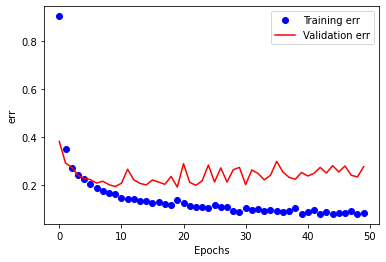

In [51]:
# plot the lost function on training data and validation data
import matplotlib.pyplot as plt
%matplotlib inline

loss_train = histotry.history['loss']
loss_val = histotry.history['val_loss']

epochs = range(len(loss_train))

plt.plot(epochs, loss_train, 'bo', label='Training err')
plt.plot(epochs, loss_val, 'r', label='Validation err')
plt.xlabel('Epochs')
plt.ylabel('err')
plt.legend()
plt.show()


In [53]:
# from the graph, its better to choose epoch = 20 where the model has the best perform on validation dataset
# so tune the hyperparameter and re-train

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

model = Sequential()

# model.add(Dropout(0.5))
model.add(Dense(25, input_dim = 28*28,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(10, activation = 'softmax'))

# set lr = 0.00001

from keras import optimizers
learning_rate = 1E-5
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_tr, validation_data=(X_val, y_val), epochs= 20, verbose=2)

Epoch 1/20
1500/1500 - 3s - loss: 0.8410 - accuracy: 0.7958 - val_loss: 0.3744 - val_accuracy: 0.8913
Epoch 2/20
1500/1500 - 2s - loss: 0.2966 - accuracy: 0.9180 - val_loss: 0.2699 - val_accuracy: 0.9228
Epoch 3/20
1500/1500 - 2s - loss: 0.2412 - accuracy: 0.9312 - val_loss: 0.2153 - val_accuracy: 0.9410
Epoch 4/20
1500/1500 - 2s - loss: 0.2121 - accuracy: 0.9404 - val_loss: 0.2453 - val_accuracy: 0.9333
Epoch 5/20
1500/1500 - 2s - loss: 0.1963 - accuracy: 0.9458 - val_loss: 0.2078 - val_accuracy: 0.9431
Epoch 6/20
1500/1500 - 2s - loss: 0.1738 - accuracy: 0.9516 - val_loss: 0.2012 - val_accuracy: 0.9461
Epoch 7/20
1500/1500 - 2s - loss: 0.1714 - accuracy: 0.9527 - val_loss: 0.1986 - val_accuracy: 0.9463
Epoch 8/20
1500/1500 - 2s - loss: 0.1556 - accuracy: 0.9555 - val_loss: 0.1949 - val_accuracy: 0.9445
Epoch 9/20
1500/1500 - 2s - loss: 0.1562 - accuracy: 0.9574 - val_loss: 0.1887 - val_accuracy: 0.9490
Epoch 10/20
1500/1500 - 2s - loss: 0.1431 - accuracy: 0.9594 - val_loss: 0.1688 - 

In [62]:
test_acc = model.evaluate(X_test,y_test)[1]
best_val_acc = history.history['val_accuracy'][19]

313/313 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9576


In [63]:
print("best accuracy on the validation is:",best_val_acc)
print("test accuracy is :",test_acc)

best accuracy on the validation is: 0.9581666588783264
test accuracy is : 0.9575999975204468


In [ ]:
# a brief description of your observations:
#       This is a very easy and classical Number detection problem 
#       However each number image is white or black (0,1)
#       So with some layers ,the model can get trained almost perfectly, epoch (15-20) is enough
#       For this question, its a 10-classes multi-classification problem so the last activation function is softmax
#       There are a lot of advanced optimizers in keras which are far away better than normal GD or SGD